In [1]:
from __future__ import division
import numpy as np
import nibabel as nb
from ipywidgets import interact
from ipywidgets import widgets
import matplotlib.pyplot as plt
import scipy.ndimage
%matplotlib inline

In [2]:
def plot_three(img, x, y, z):
    fig = plt.figure(figsize=(20, 20)) 
    plt.subplot(1, 3, 1)
    plt.imshow(np.rot90(img[:, :, z]),
                        cmap=plt.cm.gray,
                        interpolation='none'
                        )
    plt.subplot(1, 3, 2)
    plt.imshow(np.rot90(img[:, y, :]),
                        cmap=plt.cm.gray,
                        interpolation='none'
                        )
    plt.subplot(1, 3, 3)
    plt.imshow(np.rot90(img[x, :, :]),
                        cmap=plt.cm.gray,
                        interpolation='none'
              )

In [3]:
def show_image(path, x, y, z):
    img = nb.load(path).get_data()[..., 0]
    limits = (0, 2000)
    plot_three(img, x, y, z)
    segmentation_seed = np.zeros(img.shape, dtype=np.uint8)
    #segmentation_seed[img == 0] = 1
    #segmentation_seed[np.logical_and(img > 0, img < 300)] = 2
    segmentation_seed[np.logical_and(img > 650, img < 1000)] = 3
    segmentation_seed[np.logical_and(img > 1000, img < 1450)] = 4     
    plot_three(segmentation_seed, x, y, z)
    plt.figure()
    plt.hist(img[img > 0].flatten(), bins=256)
    plt.yscale('log', nonposy='clip')


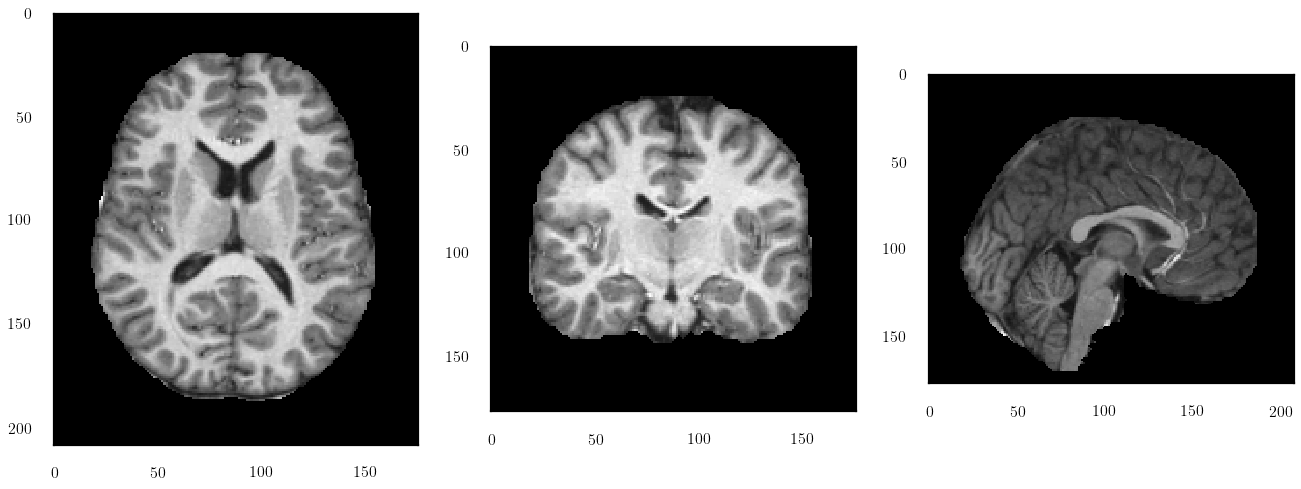

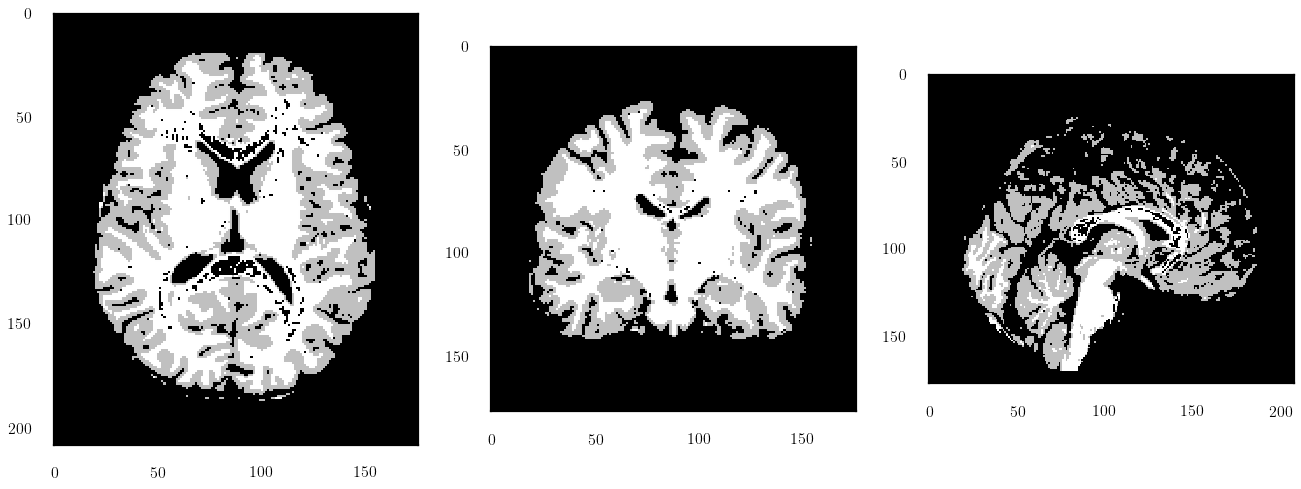

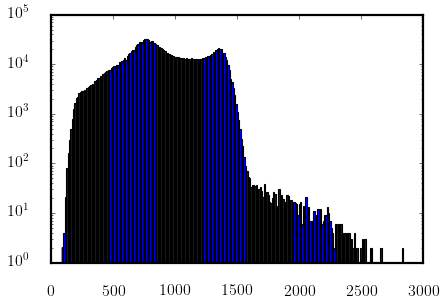

In [4]:
shape = (176, 208, 176)
path = widgets.Text("../data/set_train/train_1.nii")
interact(
    show_image,
    path=path,
    x=widgets.IntSlider(min=0, max=shape[0] - 1, step=1, value=shape[0] // 2),
    y=widgets.IntSlider(min=0, max=shape[1] - 1, step=1, value=shape[1] // 2),
    z=widgets.IntSlider(min=0, max=shape[2] - 1, step=1, value=shape[2] // 2),
);

(1, 110381.53529186166)
(2, 47204.461529420048)
(3, 29043.001722943784)
(4, 20424.284210101468)
(5, 15478.264779924362)
(6, 12295.894784632652)
(7, 10081.388173685829)
(8, 8451.3642818489025)
(9, 7201.1911929289809)
(10, 6212.4986777882796)
(11, 5412.1526111458643)
(12, 4752.4301636897062)
(13, 4200.744959071536)
(14, 3733.992480496564)
(15, 3335.2705436421611)
(16, 2991.8874773804232)
(17, 2694.1023783336491)
(18, 2434.2995675907432)
(19, 2206.4304972219984)
(20, 2005.6260285987803)
(21, 1827.9205337047749)
(22, 1670.0513670250657)
(23, 1529.3103553810445)
(24, 1403.431956811713)
(25, 1290.5077650239355)
(26, 1188.9202701629492)
(27, 1097.2909151394333)
(28, 1014.4389161995427)
(29, 939.34829428695355)
(30, 871.14124405995028)
(31, 809.05644812133733)
(32, 752.43128856217402)
(33, 700.68715817175723)
(34, 653.31725769220691)
(35, 609.87640239354471)
(36, 569.97246419163184)
(37, 533.25915373866178)
(38, 499.42990689856725)
(39, 468.2126864415996)
(40, 439.36554602410757)
(41, 412.6728

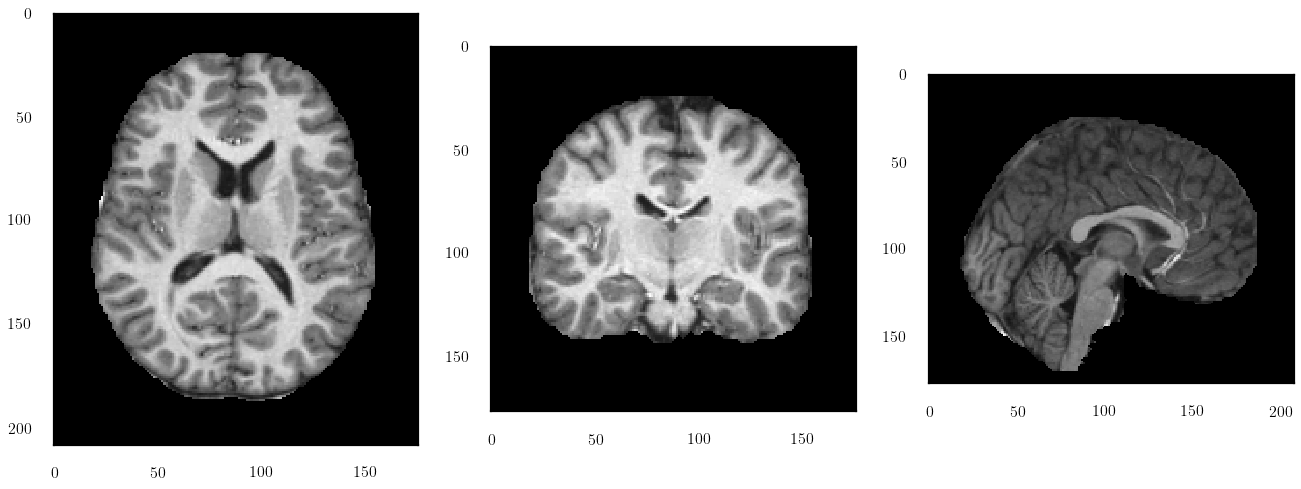

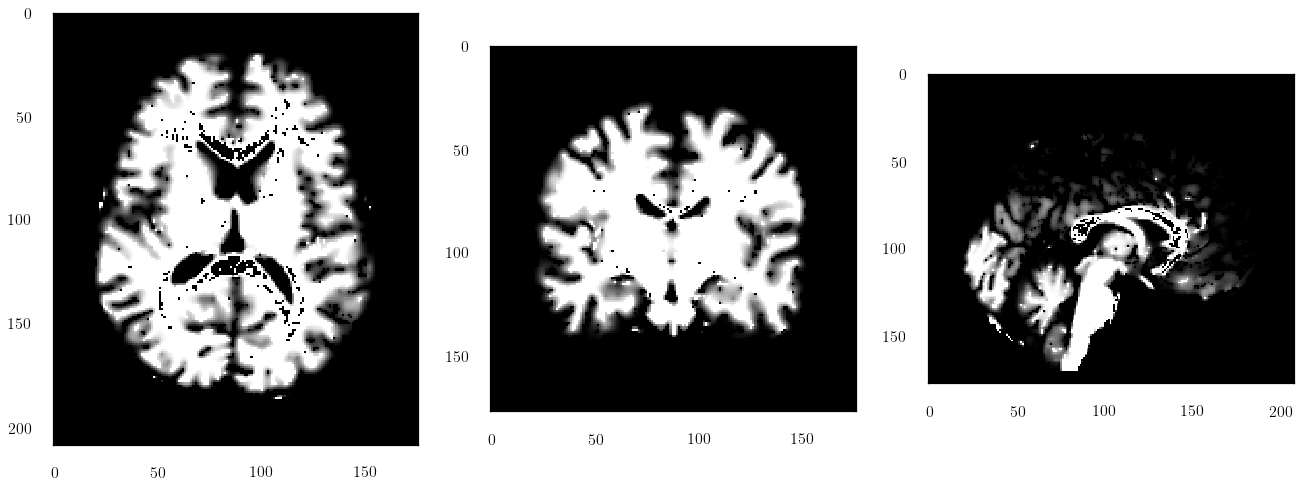

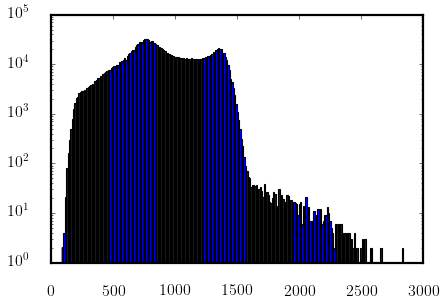

In [7]:
def calculate_cortical_thickness(path, x, y, z):
    img = nb.load(path).get_data()[..., 0]
    limits = (0, 2000)
    plot_three(img, x, y, z)
    seed = np.zeros(img.shape, dtype=float)
    #segmentation_seed[img == 0] = 1
    #segmentation_seed[np.logical_and(img > 0, img < 300)] = 2
    seed[np.logical_and(img > 650, img < 1000)] = 500
    seed[np.logical_and(img > 1000, img < 1450)] = 1000
    mask = np.zeros(seed.shape, dtype=np.bool)
    mask[seed == 500] = 1
    n_iter = 0
    eps = 10000
    max_eps = 1
    max_iter = 1000
    while n_iter < max_iter and eps > max_eps:
        old = seed.copy()
        seed[1:-1, 1:-1, 1:-1] = (
            seed[0:-2, 1:-1, 1:-1] + seed[2:, 1:-1, 1:-1] +
            seed[1:-1, 0:-2, 1:-1] + seed[1:-1, 2:, 1:-1] +
            seed[1:-1, 1:-1, 0:-2] + seed[1:-1, 1:-1, 2:]
        ) / 6
        seed[mask == 0] = old[mask == 0]
        n_iter += 1
        update = (seed - old).flatten()
        eps = np.sqrt(np.dot(update, update))
        print(n_iter, eps)
    plot_three(seed, x, y, z)
    plt.figure()
    plt.hist(img[img > 0].flatten(), bins=256)
    plt.yscale('log', nonposy='clip')

path = widgets.Text("../data/set_train/train_1.nii")
interact(
    calculate_cortical_thickness,
    path=path,
    x=widgets.IntSlider(min=0, max=shape[0] - 1, step=1, value=shape[0] // 2),
    y=widgets.IntSlider(min=0, max=shape[1] - 1, step=1, value=shape[1] // 2),
    z=widgets.IntSlider(min=0, max=shape[2] - 1, step=1, value=shape[2] // 2),
);